First load all modules and test data:

In [3]:
import MDAnalysis
from MDAnalysis import Universe
u = Universe('BENT.pdb','BENT.xtc')

Given a universe containing trajectory data we can perform Principal Component Analyis by using the class PCA and retrieving the principal components.:

In [4]:
print (u.atoms)
import MDAnalysis.analysis.pca as pca
pc= pca.PCA(u, select='backbone',n_components=10)
pc.run()

<AtomGroup [<Atom 1: CA of type C of resname LEU, resid 1 and segid A and altLoc >, <Atom 2: CA of type C of resname ASN, resid 2 and segid A and altLoc >, <Atom 3: CA of type C of resname LEU, resid 3 and segid A and altLoc >, ..., <Atom 1768: CA of type C of resname ARG, resid 1768 and segid B and altLoc >, <Atom 1769: CA of type C of resname GLY, resid 1769 and segid B and altLoc >, <Atom 1770: CA of type C of resname THR, resid 1770 and segid B and altLoc >]>


In [5]:
print(pc.p_components.shape) 

(5310, 10)


In [6]:
backbone = u.select_atoms('backbone')
n_bb = len(backbone)
print('There are {} backbone atoms in the analysis'.format(n_bb))

There are 1770 backbone atoms in the analysis


In [7]:
import numpy as np
s=np.sort(pc.cumulated_variance)
print(s)

[0.55924451 0.76385616 0.85397043 0.92349349 0.94607668 0.96229317
 0.96937982 0.97395287 0.97694387 0.97959896]


Inspect the components to determine the principal components you would like
to retain. The choice is arbitrary, but I will stop when 95 percent of the
variance is explained by the components. This cumulated variance by the
components is conveniently stored in the one-dimensional array attribute
``cumulated_variance``. The value at the ith index of `cumulated_variance`
is the sum of the variances from 0 to i.

In [8]:
import numpy as np
n_pcs = np.where(pc.cumulated_variance > 0.95)[0][0]
atomgroup = u.select_atoms('backbone')
pca_space = pc.transform(atomgroup, n_components=n_pcs) #projects on 5 components with 95% of the variance

generates the principal components of the backbone of the atomgroup and then transforms those atomgroup coordinates by the direction of those variances.

In [9]:
print(pca_space.shape) 

(5506, 5)


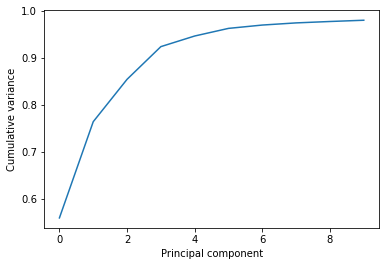

In [10]:
import matplotlib.pyplot as plt
plt.plot(pc.cumulated_variance[:10])
plt.xlabel('Principal component')
plt.ylabel('Cumulative variance');

This curve quantifies how much of the total variance is contained within the first N components. For example, we see that the first 2 components contain approximately 75% of the variance, while you need around 6 components to describe the variance above 95%.

In [15]:
transformed = pc.transform(backbone, n_components=5)
PC1=transformed[:,0]
PC2=transformed[:,1]

import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)


# np.set_printoptions(threshold=sys.maxsize)



In [26]:
import pandas as pd
df = pd.DataFrame(transformed,
columns=['PC{}'.format(i+1) for i in range(5)])
df['Time (ns)'] = df.index * u.trajectory.dt *0.001  #dt is in ps its value is 100ps we convert it to ns using 0.001 then dt becomes 0.1 ns so to get 100 ns we multiply 1000
#print(u.trajectory.dt*0.001)
#print(df['Time (ns)'])
data=np.column_stack([PC1, PC2,df['Time (ns)']])
datafile_path = "/Users/nidhisoley/Desktop/RA-SCI/bent/databent.txt"
np.savetxt(datafile_path , data, fmt=['%0.4f','%0.4f','%0.4f'])
# = zip(PC1,PC2,df['Time (ns)'])
#print(data)
#df.head()
#print(data)

/Users/nidhisoley/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


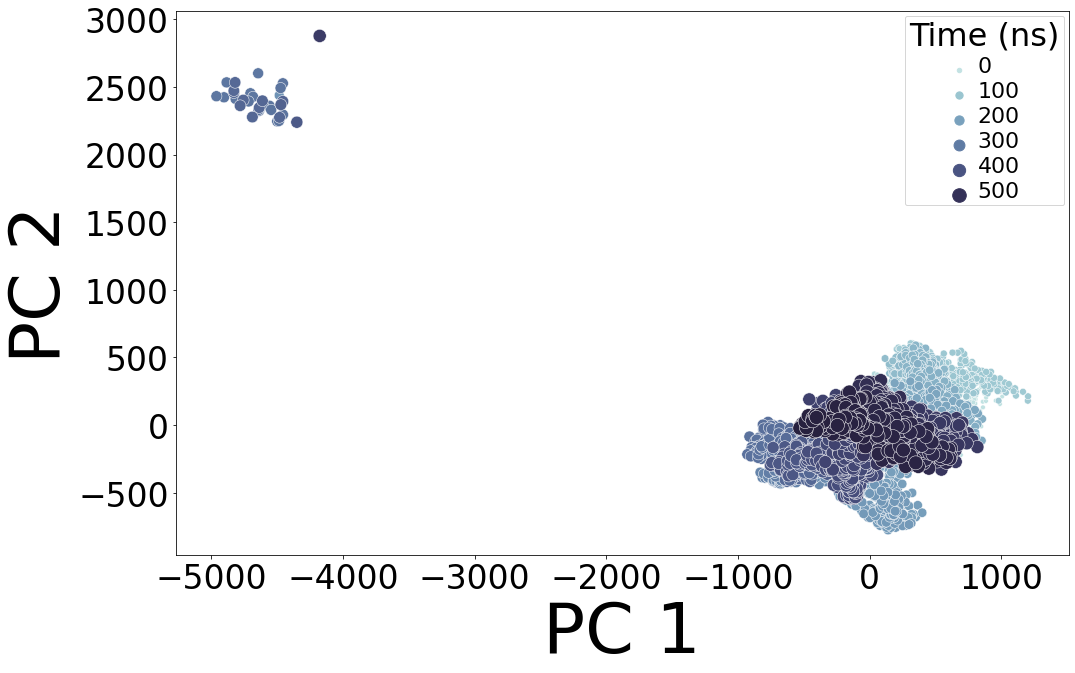

In [23]:
fig = plt.figure(figsize = (16,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1', fontsize = 70)
ax.set_ylabel('PC 2', fontsize = 70)
#ax.set_title('Plot of 1st Two Principal Components', fontsize = 30)
# Create as many colors as there are unique midwest['category']
import seaborn as sns
g =sns.scatterplot(PC1, PC2,
              hue='Time (ns)',
              data=df,size="Time (ns)",sizes=(20, 200),palette="ch:start=.2,rot=-.3");
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title

# ax.scatter(PC1, PC2, s = 50,c='Time (s)')
plt.xticks(fontsize=33)
plt.yticks(fontsize=33)
#ax.grid()
plt.savefig('/Users/nidhisoley/Desktop/RA-SCI/bent/bentpca.png',bbox_inches="tight")

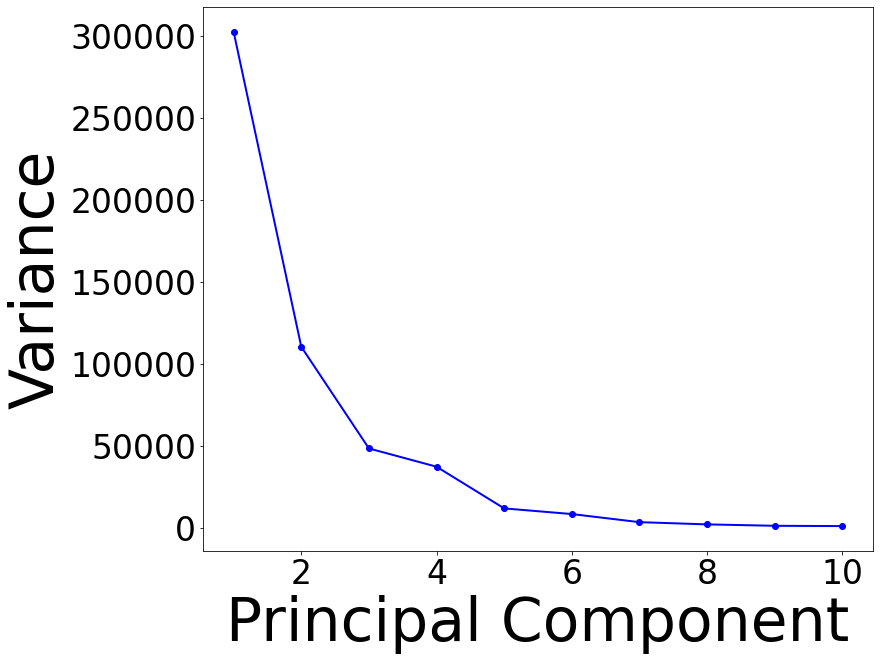

In [43]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,10))
PC_values = np.arange(pc.n_components) + 1
ax=plt.plot(PC_values, pc.variance, 'ro-', linewidth=2,color="blue")
plt.xlabel('Principal Component', fontsize = 60)
plt.ylabel('Variance', fontsize = 60)
#plt.title('Scree Plot', fontsize = 40)
plt.xticks(fontsize=33)
plt.yticks(fontsize=33)
plt.savefig('/Users/nidhisoley/Desktop/RA-SCI/bent/bentscree.png',bbox_inches="tight")
plt.show()


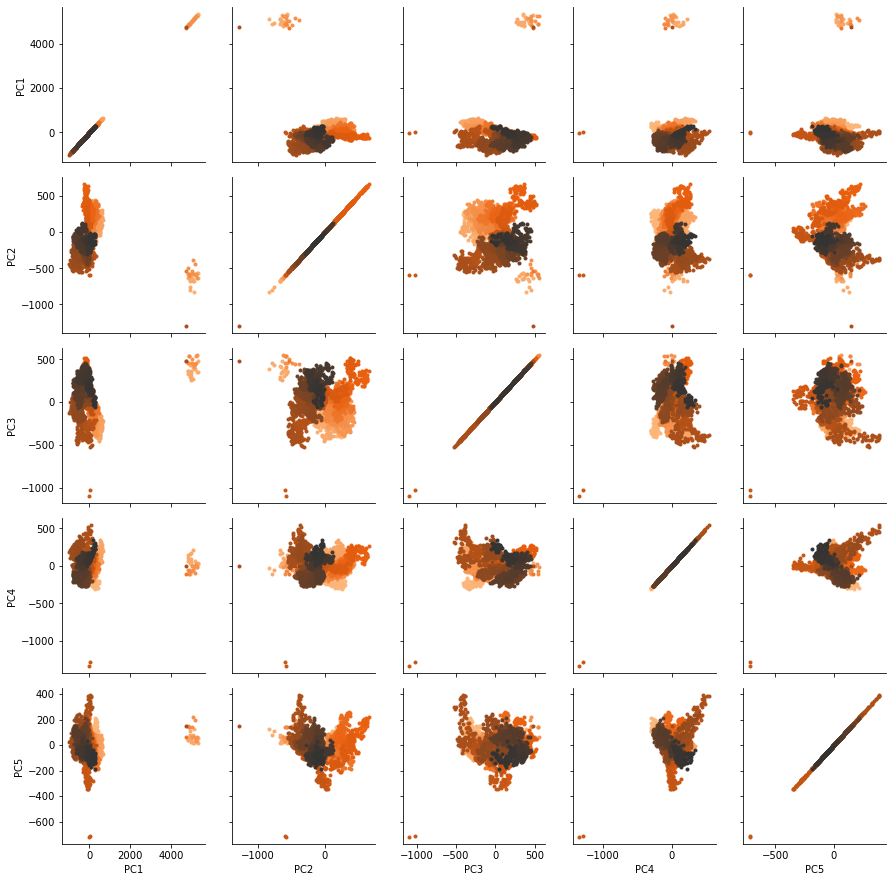

In [22]:
import seaborn as sns

g = sns.PairGrid(df, hue='Time (ps)',
                 palette=sns.color_palette('Oranges_d',
                                           n_colors=len(df)))
g.map(plt.scatter, marker='.')

In [23]:
pc.variance

array([413836.552431  ,  70333.7759093 ,  47032.94074006,  18947.70360797,
         9350.09585828,   7394.41829451,   3776.78403722,   1384.05242144,
         1309.32989062,    768.40754044])